In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

In [2]:
def root(A):
    num_node = A.shape[0]
    root1 = np.random.randint(num_node) 
    root1_neighbor = np.nonzero(A[root1])[0]
    root2 = np.random.choice(root1_neighbor)
    return num_node,root1,root2

def neighbors(A,node):
    return np.nonzero(A[node])[0]

def new_root(L):
    return np.random.choice(L)

def generate_random_Ad(show_graph=False):
    _G = nx.erdos_renyi_graph(30, 0.1, seed=None, directed=False)
    Gcc = sorted(nx.connected_components(_G), key=len, reverse=True)
    G = _G.subgraph(Gcc[0])
    Ad = nx.adjacency_matrix(G, nodelist=G.nodes)
    Ad = Ad.todense()
    G = nx.convert_matrix.from_numpy_matrix(Ad)
    if show_graph:
        nx.draw(G, with_labels=True)
        plt.show()
    tol = 1e-8
    isSymmetry = np.all(np.abs(Ad-Ad.T) < tol)
    #print("Adjacency matrix Ad is symmetric: ", isSymmetry)
    return Ad

def draw_colored_graph(Ad, class_0, class_1):
    G = nx.convert_matrix.from_numpy_matrix(Ad)
    color_list = []
    for node in G.nodes:
        if node in class_0:
            color_list.append("red")
        elif node in class_1:
            color_list.append("blue")
        else:
            color_list.append("black")
    options = {
        'node_color': color_list,
        'node_size': 20,
        'width': 1,
        'with_labels': True,
    }
    nx.draw(G, **options)
    plt.show()


In [3]:
def draw_3d_scatter(attributes, class_0, class_1):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    array_0 = attributes[class_0,:]
    array_1 = attributes[class_1,:]
    ax.scatter(array_0[:,0],array_0[:,1],array_0[:,2], marker='^', color='r')
    ax.scatter(array_1[:,0],array_1[:,1],array_1[:,2], marker='o', color='b')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    plt.show()

In [4]:
def sub_graph(A):
    num_node,root1,root2=root(A)
    class_1=[root1]
    class_2=[root2]
    frontier_1=[root1]
    frontier_2=[root2]
    #print(root1,root2)
    while len(frontier_1)!= 0 and len(frontier_2)!=0:
        root_1 = new_root(frontier_1)
        frontier_1= list(set(frontier_1)-set([root_1]))
        #print(neighbors(A,root_1))
        neighbor_1 = list(set(neighbors(A,root_1))-set(class_2)-set(class_1))
        class_1.extend(neighbor_1)
        frontier_1 = list(set(frontier_1)|set(neighbor_1))


        root_2 = new_root(frontier_2)
        frontier_2= list(set(frontier_2)-set([root_2]))
        neighbor_2 = list(set(neighbors(A,root_2))-set(class_1)-set(class_2))
        class_2.extend(neighbor_2)
        frontier_2 = list(set(frontier_2)|set(neighbor_2))
        #print(class_1,class_2)

    all_node=[i for i in range(num_node)]
    if len(frontier_1)==0:
        class_2 = list(set(all_node)-set(class_1))
    if len(frontier_2)==0:
        class_1 = list(set(all_node)-set(class_2))

    return class_1,class_2


In [5]:
def attribute(mu1,mu2,sigma,class1,class2):
    attribute=np.zeros([len(class1)+len(class2),len(mu1)])
    #print(class1,class2)
    #print(len(class1)+len(class2))
    for i in range(len(class1)):
        attribute[class1[i]]=np.random.multivariate_normal(mu1, sigma, 1, 'raise')
    for i in range(len(class2)):
        attribute[class2[i]]=np.random.multivariate_normal(mu2, sigma, 1, 'raise') 
    return attribute

In [6]:
def generator(A,mu1,mu2,sigma):
    class1,class2=sub_graph(A)
    ww=attribute(mu1,mu2,sigma,class1,class2)
    draw_colored_graph(A, class1, class2)
    draw_3d_scatter(ww,class1,class2)
    lb = [int(i in class2) for i in range(len(class1)+len(class2))]
    return ww,lb

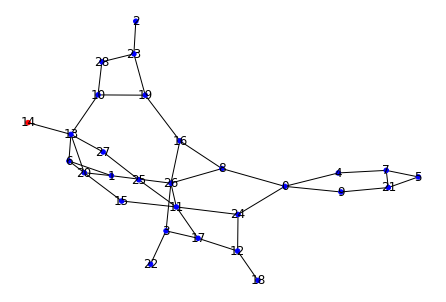

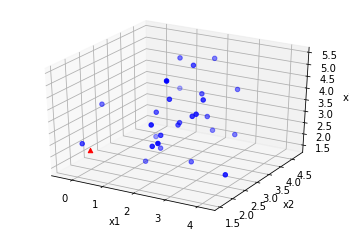

[[ 1.55509028  2.85797919  1.96381034]
 [ 2.07586561  1.90193792  3.71309304]
 [ 2.7615856   3.04056541  4.22311308]
 [ 2.38980246  3.68202835  3.03506387]
 [ 1.9931441   2.34907077  2.96803045]
 [ 2.80590158  2.71412278  3.83810657]
 [ 2.73704691  4.46261022  3.8146447 ]
 [ 0.15124892  1.56099206  2.63529266]
 [ 3.11231092  3.9017435   2.29236194]
 [ 2.70591373  2.68819787  3.73907777]
 [ 1.38298281  2.90905243  3.4451598 ]
 [ 0.72359158  4.6319808   3.28660216]
 [ 0.88622582  3.47223935  1.89762722]
 [ 1.92313722  3.69531407  5.08479576]
 [-0.0464501   2.01837256  2.01478878]
 [ 2.34420357  2.16292331  5.41665531]
 [ 2.55490102  2.84889044  1.63972287]
 [ 1.26150172  2.62003599  1.46490434]
 [ 1.88068247  2.82149991  4.16855646]
 [ 1.97797063  3.09232969  3.03509685]
 [ 1.76860086  4.74210623  4.75735137]
 [ 2.14392753  3.76327443  3.90023654]
 [ 2.58684031  1.53954599  3.30658116]
 [ 2.24578619  1.7304135   2.96924926]
 [ 2.43804076  3.84461645  2.34494109]
 [ 1.0213504   4.27562737

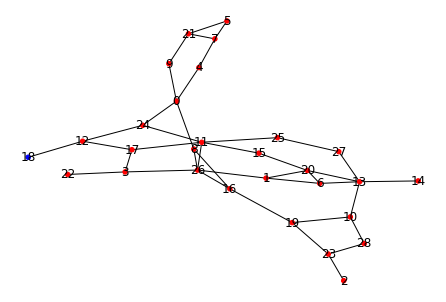

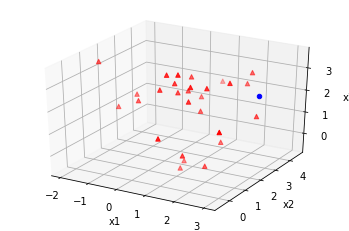

[[ 1.12890402  2.24251182  1.58825507]
 [ 1.01564778  1.19614831 -0.59961633]
 [-1.25891148  1.4020329   1.57173086]
 [ 1.40488147  1.11373571  3.15841349]
 [ 1.94314681  2.05106436  0.45542924]
 [ 1.274311    1.23287605  2.44811334]
 [ 1.24968415 -0.53248735  1.56023316]
 [-0.96453176  2.01462695  1.95398873]
 [ 2.05740606  3.78912462  2.91520141]
 [ 0.65221658  4.52816098  1.92734917]
 [ 0.94139831  1.56784876 -0.44459707]
 [ 0.59748428  1.79152361  2.47138221]
 [ 3.00673135 -0.04620496  2.07874177]
 [ 1.66302841  1.64254002  2.95852728]
 [ 0.29439601  1.23810626  2.73652089]
 [ 2.00657911  0.94278029 -0.134712  ]
 [ 2.17154383  2.12718342  3.11555076]
 [ 0.65934236  2.31655773  2.36129589]
 [ 2.49691397  3.39175658  2.12436699]
 [ 2.86851258  2.55830694  1.64106603]
 [ 1.56729907  0.35093593  0.49256363]
 [ 1.90311162  3.78240106  2.39237235]
 [-0.53764795  1.38044568  2.01385591]
 [-1.96228977  1.46917672  3.3884375 ]
 [ 0.54761068  1.20677714  3.45673955]
 [ 0.63813595  1.52713356

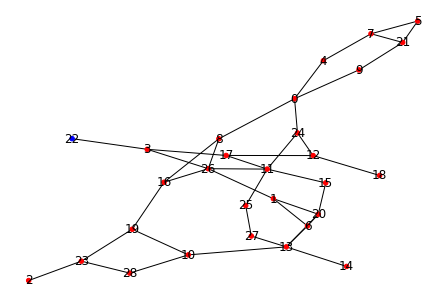

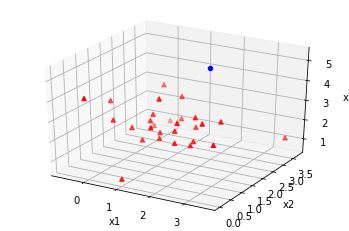

[[ 2.87509753  1.24966489  2.17380804]
 [-0.1164654   3.50781531  2.8835546 ]
 [ 1.67425601  1.45255963  2.75223183]
 [ 1.9527442   1.76361032  1.71152418]
 [ 1.48808113  1.62178658  2.17996146]
 [ 1.89366205  1.71708747  1.50623517]
 [ 1.70114737  1.29770631  1.84917124]
 [ 0.95421952  1.72530988  1.56649996]
 [ 0.78578612  3.00081541  2.85647948]
 [ 1.85087308  2.00331816  2.73755486]
 [ 0.50792134  1.97975614  2.16745156]
 [ 0.58966259  1.50100787  1.51319785]
 [ 0.9216913   1.77469144  3.52996832]
 [ 0.27630868  1.50134986  2.04884967]
 [ 0.97131381  0.05363548  0.61759225]
 [-0.34724726  0.40556702  4.00983781]
 [ 0.69887542  3.11131585  1.59871147]
 [ 2.27184476  1.66977918  2.76886538]
 [-0.2105177   1.38136974  2.35693412]
 [ 3.56975566  3.5730556   1.22705083]
 [-0.11087039  3.03630041  1.035726  ]
 [ 2.57955094  2.04488226  2.72983963]
 [ 2.24147196  2.02511527  5.29796466]
 [ 0.83169034  1.93417603  1.68494345]
 [ 1.50303435  2.56440311  1.7668984 ]
 [ 0.4725526   2.15068502

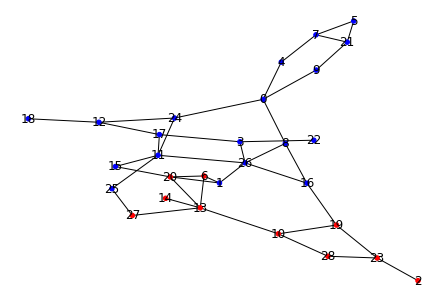

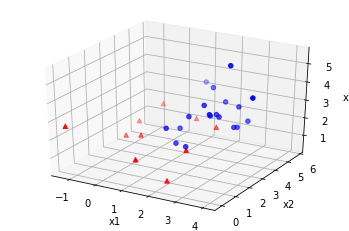

[[ 1.75713981  1.8854228   1.7611633 ]
 [ 1.42827165  1.81618065  2.52384416]
 [ 1.11342276  0.27697534  1.40313456]
 [ 3.31171788  4.07409464  2.43912267]
 [ 2.54859797  2.73132867  3.18034387]
 [ 3.14836751  3.35499089  2.36956725]
 [ 2.12238597  0.56552383  0.38231268]
 [ 2.83335764  3.64863146  5.49892287]
 [ 2.69750089  3.14709352  2.91181491]
 [ 3.12445952  3.65101834  2.23535464]
 [ 0.37328624  3.59004387  2.82528581]
 [ 1.49088425  2.67795372  2.16083178]
 [ 1.86350305  2.59519015  2.94331172]
 [ 1.5838574   3.68649219  2.28054898]
 [ 2.50136194  3.34995622  2.19249388]
 [ 2.59088592  3.15962883  3.00809717]
 [ 2.35189566  4.3098346   3.14273734]
 [ 2.24685965  2.94109299  3.51088332]
 [ 0.87374569  5.76688058  3.2515711 ]
 [ 0.46661918  1.83130047  1.86604489]
 [-0.07181958  1.77215741  1.74179909]
 [ 2.96196434  4.07817204  3.13509859]
 [ 2.19694298  1.73897348  1.75972966]
 [ 2.30907006  1.55749541  1.6761938 ]
 [ 4.04050534  2.85456937  4.42759471]
 [ 2.48024501  2.93940958

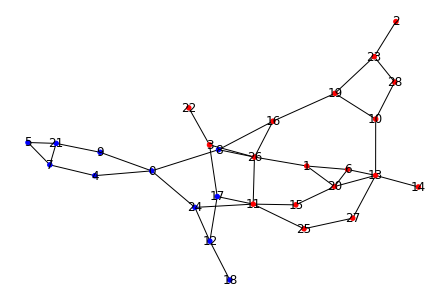

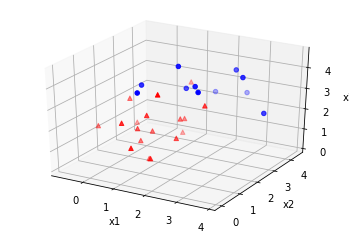

[[ 1.7292375   3.93335422  2.56166178]
 [ 1.3888946  -0.04125399  1.74087419]
 [ 1.74421025  0.77630001  3.94362027]
 [ 1.22222142  3.07675594  1.51266707]
 [ 0.79908683  1.49511144  3.79555276]
 [ 2.53582375  1.54610627  3.8955167 ]
 [ 1.60784724  0.59202143  0.96002266]
 [ 3.85012698  2.85594702  2.62595749]
 [ 1.64290738  2.44686866  3.41090114]
 [ 3.09261116  3.00146288  4.04495595]
 [ 0.88505617  1.69500345  0.1350738 ]
 [ 0.62298052  1.68527069  0.96240676]
 [ 1.12993752  0.74150315  3.87748996]
 [ 1.33632287  2.6452409   1.74294348]
 [ 2.30967168  2.31419695  2.8248357 ]
 [-0.70502767  1.57807195  1.36943265]
 [-0.16733223  2.41613536  2.45242429]
 [ 2.54975073  3.61182062  3.97857062]
 [ 2.24013648  1.89773579  3.92007415]
 [ 1.76027225  1.71190446  1.39624267]
 [ 0.63240224  1.51387126  1.64667442]
 [ 1.62766176  2.04894239  4.62302249]
 [ 0.72547518  0.56052622  2.42683781]
 [ 0.82638125  1.98492291  1.3393478 ]
 [ 2.48363547  4.40673332  2.48777588]
 [ 0.70758168  4.32469634

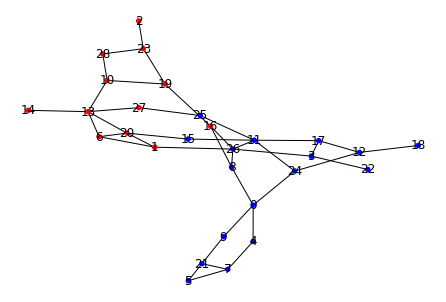

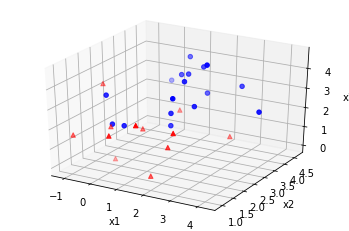

[[ 1.7193888   3.91352181  2.65824722]
 [ 0.65002517  2.24963118  1.59324568]
 [-0.2123944   1.84741018  1.74350163]
 [ 2.34629216  3.09114431  4.70243481]
 [-0.27572067  4.66760895  2.3928774 ]
 [ 0.51463911  1.6042205   2.13964167]
 [ 2.04797755  1.70530762  1.36474862]
 [ 1.18891489  3.68379213  3.64002945]
 [ 0.63224706  4.44053246  3.95800801]
 [ 0.13147497  1.53635881  2.1651977 ]
 [ 1.44302023  1.04374698  2.75526284]
 [ 2.21417366  2.69387681  2.84956278]
 [ 4.23240666  3.13035267  2.80785149]
 [ 1.68000479  1.37628108  0.00601415]
 [ 0.52802725  0.93746077  2.06120375]
 [ 1.64957097  2.93341556  3.81166441]
 [-1.11402589  2.55927692  3.27590665]
 [ 2.88214239  4.07461196  3.19111536]
 [ 0.8184632   3.81353384  3.44980076]
 [-0.20520438  1.98964165 -0.036582  ]
 [ 2.43259904  1.48498691  2.33277982]
 [ 1.49457497  2.50463534  1.81134356]
 [ 1.58368927  2.40709637  2.52648518]
 [ 3.06420791  3.3038467   1.13690254]
 [-0.45547388  1.95796591  3.21692151]
 [ 1.54824084  3.9411265 

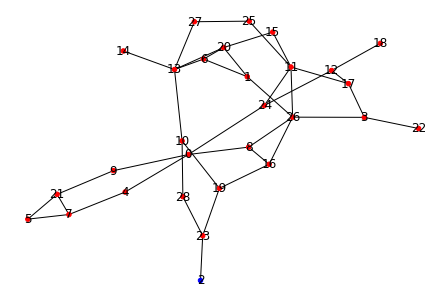

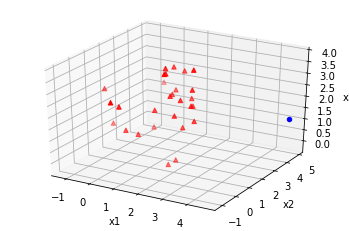

[[ 1.20094555  2.31702644  2.3047501 ]
 [ 2.3478547   1.73796142  2.89685902]
 [ 4.66816012  4.86158163  1.03609501]
 [ 0.97365533  2.9830326   2.24327428]
 [ 0.34531957  0.46319923  1.1941422 ]
 [ 2.47654696  1.60092731  3.80046307]
 [ 0.71580481 -1.10219889  2.98131169]
 [ 2.03033198  2.35825839  1.93972584]
 [ 2.50027816  1.37987299  2.35698086]
 [ 1.79208114  2.69247311  2.11682468]
 [-0.93134657  1.674483    0.83360642]
 [ 1.7611065   1.03055621 -0.23814378]
 [ 1.64173878  0.9914555   3.66146227]
 [ 1.87635428  1.37585473 -0.13739997]
 [ 1.94567717  1.75993596  1.18317132]
 [-0.27947266  4.28002921  1.92719106]
 [ 1.30928042  1.65570649  3.63659851]
 [ 0.39824916  2.35838429  0.6933902 ]
 [ 1.58663145  1.49229982  2.56801073]
 [ 0.53183778 -0.26675925  2.48926454]
 [ 1.17696062  3.26360596  3.01377369]
 [ 1.10125822  1.23181263  1.95739138]
 [ 2.54359533  1.53294239  1.66004551]
 [-1.20437624  1.5831869   2.33686523]
 [ 1.87633062  1.28426252  1.84231038]
 [ 2.03132763  1.44672884

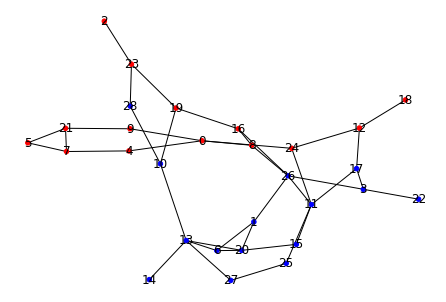

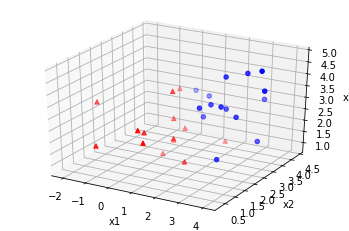

[[-0.76430517  0.28948952  2.06487555]
 [-0.01542489  4.34668232  2.62611805]
 [ 0.5586915   3.11568067  1.6548626 ]
 [ 1.8790324   2.86276747  3.04843796]
 [ 0.86370844  2.18212897  1.7253074 ]
 [-0.3753407   3.9233991   2.84050017]
 [ 2.90333551  3.47144793  4.27039731]
 [ 0.38245967  1.29954648  2.34030812]
 [ 1.7277581   1.72984673  1.11499858]
 [ 0.68219785  0.67758794  2.80449401]
 [ 2.48246168  2.64946704  3.16708464]
 [ 2.23504573  3.22368543  2.75457233]
 [ 0.23102349  2.36683031  0.8484743 ]
 [ 4.03927089  2.93178518  3.98190515]
 [ 1.72770905  2.46169948  3.06954504]
 [ 2.99555243  2.80619794  2.74744629]
 [ 1.91867984  3.60413199  1.09225989]
 [ 3.01746402  1.81891835  1.43074566]
 [-2.06494182  1.74835023  2.97907448]
 [ 1.13163258  0.42218508  2.49337789]
 [ 0.85018525  4.01058168  2.69152802]
 [ 0.24499665  2.90447767  2.13129055]
 [ 1.36040831  3.10520878  2.31275279]
 [ 0.32305783  2.7637913   3.38552473]
 [ 0.1553218   2.99858471  1.10268116]
 [ 2.14934341  3.28636024

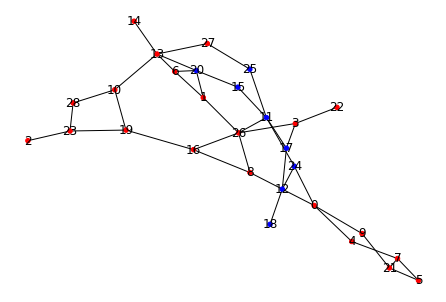

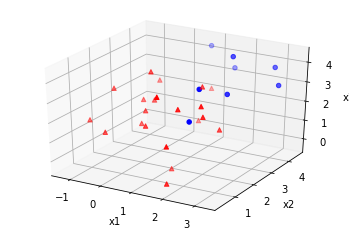

[[ 2.19727623e+00  1.66310798e+00  2.50656430e+00]
 [-3.13567763e-01  2.64339913e+00  2.12871006e+00]
 [-4.74021565e-01  9.53220092e-01  1.32513374e+00]
 [ 7.63101143e-01  4.51796110e+00  2.01389579e+00]
 [-1.65191174e-03  2.55339416e+00  3.68129641e+00]
 [ 9.35715500e-02  2.56936411e+00  2.26157886e+00]
 [ 1.93599349e+00  2.50242750e-01 -1.52614580e-01]
 [ 5.79460322e-01  1.34878612e+00  1.74507187e+00]
 [ 1.84592573e+00  3.88635290e-01  1.64589126e+00]
 [-4.16565840e-01  3.65021000e+00  2.57143576e+00]
 [ 2.30298333e+00  2.37044840e+00  1.49034851e+00]
 [ 1.92662755e+00  3.67795509e+00  4.39475781e+00]
 [ 1.77996499e+00  2.15262600e+00  3.51382959e+00]
 [-9.34684308e-01  2.11967606e+00  2.81125185e+00]
 [ 1.58218835e+00  1.38940523e+00  2.86052724e+00]
 [ 2.31276903e+00  2.73181965e+00  3.10360261e+00]
 [-1.28557923e+00  1.41274697e+00  1.45995100e+00]
 [ 3.29666359e+00  3.80452301e+00  3.26234367e+00]
 [ 1.73895487e+00  4.11659772e+00  3.55968625e+00]
 [ 6.61421759e-02  1.94503499e+

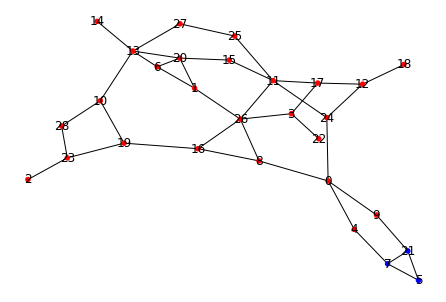

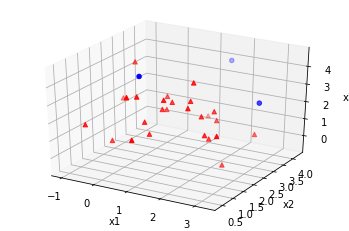

[[ 0.51311683  0.93979441  3.57326406]
 [ 0.64606765  1.5122801   1.85660362]
 [-0.47151871  0.54182219  1.99540362]
 [ 1.73641514  3.18792744  1.16463308]
 [-0.67028526  3.05986378  3.80071075]
 [ 0.75179107  1.1504732   4.66878725]
 [ 0.83562299  1.43646089  1.29515878]
 [ 1.66510576  3.98620073  4.05054964]
 [ 0.72878634  2.19123069  2.13819334]
 [-0.19000558  1.27799083  0.66588951]
 [ 0.44757749  1.47349408  3.22984984]
 [ 0.92860851  2.3433726   2.51187404]
 [ 1.02713836  1.80272055  3.0253641 ]
 [ 1.4817412   2.47380679  3.70362118]
 [ 2.63639848  3.60024414  0.38592238]
 [ 2.01530834  2.36126954  0.78644117]
 [ 0.41498952  2.90687069  2.2918812 ]
 [ 1.79725888  2.34810898  1.9950546 ]
 [ 0.48559799  2.76585736  1.65678643]
 [ 2.67970062  1.65724804  1.69150478]
 [ 0.99091301  0.43109474  1.73762814]
 [ 3.27598724  2.67323726  3.06252965]
 [ 2.39735489  2.40204746 -0.61957138]
 [ 1.4831494   2.33399147  2.7675883 ]
 [ 0.81688087  4.25260152  0.36243743]
 [ 1.66422707  1.92491815

In [7]:
mu1=(1,2,2)
sigma=[[1,0,0],[0,1,0], [0,0,1]]
mu2=(2,3,3)
A=np.array(generate_random_Ad())
for i in range(10):
    W,label=generator(A,mu1,mu2,sigma)
    print(W,label)